<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scotiabank Twitter Sentiment Analysis

API account
https://developer.twitter.com/en/portal/dashboard

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install nltk
!pip install unidecode
!pip install textaugment
!pip install joypy
!pip install wordcloud
!pip install better_profanity

     |████████████████████████████████| 983kB 7.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=bb44184ab9f63ea25a421863c2a551d032d1326d115a985bd64acdfdc36ba8a4
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect
     |████████████████████████████████| 245kB 4.9MB/s 
     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 1.0MB 9.9MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp37-none-any.whl size=15737 sha256=403149396cf6c777e617acb127d7dfd85ae15176eaefa472e32aca7d38649de2
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
Successfully built googletrans
     |█████████████████

In [ ]:
# Import Libraries
import sys
import tweepy
import pandas as pd
import numpy as np
import os
import spacy
import joypy
import unidecode
import unicodedata
import seaborn as sns
from PIL import Image

# NLP Libraries
import re
import string
import nltk
nltk.download('brown')
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.corpus import brown
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perception_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Gathering Data from Twitter using API

### Authentication Keys (Individual Account)

In [ ]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

### Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [ ]:
#Keyword Search and No of Tweets to capture
tweet_list=[]
users = ['@globeinvestor','@bloombergCA','@Marketcall','@LA&C Investments','@TheMotleyFoolCA','@BNNBloomberg','@YahooFinanceCA','@StockTrades_CA','@rcarrick','@marketsglobe','@PattieCTV','@Streetwise','@stockchase',
'@financialpost','@FinMKTG','@JonChevreau','@MoneySense','@BoomerandEcho','@squawkfox','@reformedbroker','@thestalwart' ,'@michaelbabad','@FTalphaville','@dbcurren',
'@benrabidoux','@noahpinion','@boes_','@sbarlow_ROB','@amberkanwar','@business','@elerianm','@reutersjamie','@M_C_Klein',
'@economistmeg','@tylercowen','@nictrades','@ReformedBroker','@TheStalwart','@VitalikButerin','@ritholtz','@LizAnnSonders',
'@IvanTheK','@charliebilello','@satoshilite',
'@ritholtz','@awealthofcs','@RaoulGMI','@MarkYusko','@allstarcharts','@5_min_macro','@longshorttrader','@ScottMinerd','@Callum_Thomas','@RyanDetrick','@TheBubbleBubble','@KeithMcCullough',
'@Ukarlewitz','@cullenroche','@DougKass']

# Failed to retrieve
#'@LA&C Investments','@katie_martin_FX','@mikepmoffat'


# For loop to run the list of usernames and then for loop to extract Full Text from the tweets
for user in users:
    tweets = api.user_timeline(screen_name = user, count = 100, lang = "en", tweet_mode = "extended")
    for tweet in tweets:
      tweet_list.append(tweet.full_text)
      #print (tweet.full_text)
    #print(f"- {tweet.full_text}")


In [ ]:

#Keyword Search and No of Tweets to capture

search_keyword = ['scotiabank','BNS','Canadian Banking','Canadian Banks','Earnings release','EPS','Profits','Reserves','Provisions','Big5','PCL', 'Risk','Retail lending',
'Secured loans','Unsecured loans','Mortgages','Home equity loans','Auto loans','Line of credit','Credit cards','Personal loans','Loan growth','Loan origination','Credit quality','Delinquency','Past due loans','Impaired loans','Allowances','Reserves','Loan loss','Credit loss','Vintage','Write offs','Collections','Strategy']
#tweets = tweepy.Cursor(api.search, q=search_keyword).items(no_Tweet)
for search in search_keyword:
    tweets = tweepy.Cursor(api.search, q=search_keyword,lang = "en",tweet_mode = "extended").items(100)
    for tweet in tweets:
      tweet_list.append(tweet.full_text)
tweet_list[:5]

['More young Canadians are dropping their financial advisers in favour of DIY investing https://t.co/Z9B7O9EHTp',
 'RT @MarketsGlobe: Premarket: Global stock markets on edge over Delta virus variant, Fed policy https://t.co/kOxSNnhCoq (subscribers)',
 'A financial shock is coming for those who jumped into the housing market during the COVID-19 pandemic https://t.co/pLDUuCUGtp',
 'How advisors in Alberta are guiding clients through a new boom cycle https://t.co/Ja9sslU8In',
 'Which of these 10 TSX-listed oilfield services firms have further upside potential? https://t.co/klotyXIdJr']

In [ ]:
# Print and analyze the tweets in raw text
tweet_list[0:-1]

['More young Canadians are dropping their financial advisers in favour of DIY investing https://t.co/Z9B7O9EHTp',
 'RT @MarketsGlobe: Premarket: Global stock markets on edge over Delta virus variant, Fed policy https://t.co/kOxSNnhCoq (subscribers)',
 'A financial shock is coming for those who jumped into the housing market during the COVID-19 pandemic https://t.co/pLDUuCUGtp',
 'How advisors in Alberta are guiding clients through a new boom cycle https://t.co/Ja9sslU8In',
 'Which of these 10 TSX-listed oilfield services firms have further upside potential? https://t.co/klotyXIdJr',
 'TSX outruns Wall Street on earnings growth prospects as global economy rebounds https://t.co/uIO4bg7dun',
 'What happens when profit growth slows? Plus, the gas producer that’s surging amid a record-breaking heatwave https://t.co/WHKIo69Evn',
 'RT @MarketsGlobe: Canadian dollar gives back some of last week’s rally as oil dips https://t.co/VdeasBSMJx (subscribers)',
 '36% of Canadian businesses across all 

In [ ]:
# Create a copy of the list to work on
tw_list1 = tweet_list.copy()

### Using Pipeline to clean text

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [ ]:
#Cleaning pipeline (RT, Punctuation etc)

stop_words = set(stopwords.words('english')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()
    # The profanity.censor method is used to mask inappropriate words with special characters. The default setting uses “*”
    x = profanity.censor(x)
    #Removing RT
    x = re.sub('RT @\w+: '," ",x)
    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)
    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
    # Lower case
    x = x.lower()
    # Remove non-unicode
    x = unidecode.unidecode(x)
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [ ]:
# Test preprocessing pipeline
preprocess('RT http:// @ #$#% what the duck is wrong with the bank')

'duck wrong bank'

In [ ]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
#search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_list1:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)
  elif "NHL" not in x:
    list1.append(x)
  elif "StanleyCup" not in x:
    list1.append(x)

In [ ]:
tweet_list = pd.DataFrame(list1)  # Converting the list to Pandas DataFrame
tweet_list.columns=['tweets'] # Renaming the column 0 to tweets
tweet_list.head() # Display first 5 rows

,tweets
0,More young Canadians are dropping their financ...
1,RT @MarketsGlobe: Premarket: Global stock mark...
2,A financial shock is coming for those who jump...
3,How advisors in Alberta are guiding clients th...
4,Which of these 10 TSX-listed oilfield services...


In [ ]:
# Apply Preprocessing pipeline to Tweets Dataframe
tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)
# Check for duplicates and drop them.
tweet_list['tweets'].drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/SfFbEzysQn" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/LVooRyojRD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/ZipWyy0Leo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

## Sentiment Analysis using TextBlob

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,young canadian dropping financial adviser favo...,0.050000,0.200000,positive,0.000,0.707,0.293,0.4404
1,premarket global stock market edge delta virus...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,financial shock coming jumped housing market c...,0.000000,0.000000,negative,0.271,0.729,0.000,-0.3818
3,advisor alberta guiding client new boom cycle,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
4,tsx listed oilfield service firm upside potential,-0.100000,0.700000,neutral,0.000,1.000,0.000,0.0000
5,tsx outruns wall street earnings growth prospe...,0.000000,0.000000,positive,0.000,0.625,0.375,0.5859
6,happens profit growth slows plus gas producer ...,0.000000,0.000000,positive,0.000,0.645,0.355,0.6705
7,canadian dollar give back last week rally oil ...,0.000000,0.033333,neutral,0.000,1.000,0.000,0.0000
8,canadian business across sector used cews prog...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,premarket global share start week back foot co...,0.000000,0.000000,positive,0.000,0.820,0.180,0.2960


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [ ]:
tw_list_negative.head()

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,financial shock coming jumped housing market c...,0.0,0.00,negative,0.271,0.729,0.0,-0.3818
12,rising market uncertainty test investor,0.0,0.00,negative,0.375,0.625,0.0,-0.3400
19,anger soaring house price could influence cana...,-0.4,0.20,negative,0.236,0.764,0.0,-0.5719
23,missing piece fed puzzle world market theme we...,-0.2,0.05,negative,0.216,0.784,0.0,-0.2960
26,canadian need pay close attention shopping tra...,0.0,0.00,negative,0.167,0.833,0.0,-0.1027


In [ ]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
positive,2495,44.17
neutral,2078,36.79
negative,1075,19.03


# EDA (Exploratory Data Analysis)

### Hastag Frequency

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

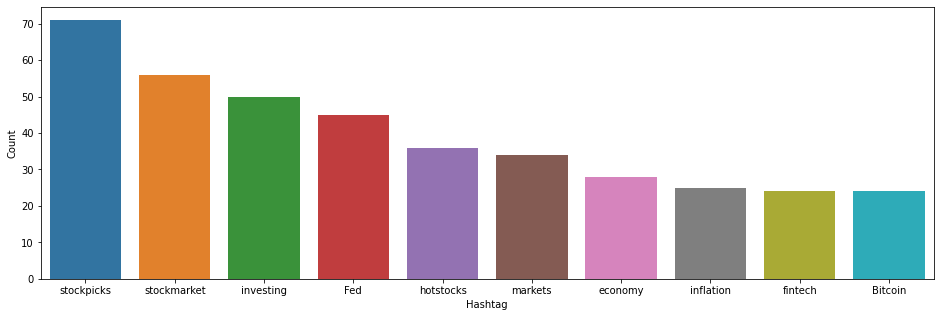

In [ ]:
HT = hashtag_extract(tw_list1) # Using the original list which is uncleaned to extract hashtags
# unnesting list
HT = sum(HT,[])
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#Returns most common terms, aside from stop words #  WIP *****

from collections import Counter
def most_common(terms_all):
    count_all = Counter()
    interesting_terms = [term for term in terms_all if term not in STOPWORDS]

    # Update the counter
    count_all.update(interesting_terms)
    return count_all.most_common(20)

most_common(tweet_list['tweets'])

[('', 159),
 ('thing stand north american market open subscriber', 23),
 ('analyst saying today subscriber', 17),
 ('thank', 14),
 ('thanks', 11),
 ('watch today subscriber', 10),
 ('thought today market', 10),
 ('probablyafad', 8),
 ('haha', 6),
 ('one', 5),
 ('lol', 5),
 ('unroll', 5),
 ('love', 4),
 ('global inflation rate', 4),
 ('new post chart sunday', 4),
 ('sending free weekly newsletter shortly sign receive latest insight', 4),
 ('year woman gotten foot door finance industry becoming bank teller path disappearing',
  3),
 ('condition ripe justin trudeau trigger election summer bid win back complete command canada legislature',
  3),
 ('toronto dominion bank cfo take head td security giving new leadership unit underperformed rival',
  3),
 ('yup', 3)]

### Wordcloud

In [ ]:
TextInBlob = TextBlob("".join(tweet_list['tweets']))
NounPhrases=TextInBlob.noun_phrases

NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)


##### Important word combinations ####
young_canadian financial_adviser_favour_diy_investingpremarket global_stock_market_edge_delta_virus_variant policy_subscriberfinancial_shock market_covid_pandemicadvisor_alberta new_boom_cycletsx oilfield_service_firm_upside_potentialtsx_outruns_wall_street_earnings_growth_prospect global_economy_reboundhappens_profit_growth_slows gas_producer heatwavecanadian_dollar week_rally_oil_dip_subscribercanadian_business statscan_reportpremarket global_share foot_covid_case_spike_subscribernordgold_cancellation_rattle_resurgent_russian_ipo_marketcommodity_outperformance market_uncertainty_test_investortom_marie_travel_world_line_credit_year financial_troublebullish co_inctwo identical_etf different_return_huhcanadian future_stock_market_return rosenberg_top_investment_idea_time rbc_sharecanadian_dollar weekly_gain_investor_cheer_u_inflation_data_subscriberu_inflation year_bofaanger house_price canadian_politics_civility_generation mental_healthchinese gia

In [ ]:
from nltk.tokenize import WordPunctTokenizer
from nltk import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.pmi,100)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result

for line in tweet_list['tweets']:
    features = get_bigrams(line)
print(features)

['interview', 'strategist', 'invest', 'confer', 'believ smartest', 'byron wien', 'confer past', 'greatest invt', 'histori john', 'interview jerri', 'invest histori', 'invt strategist', 'jerri jordan', 'john mauldin', 'jordan sr', 'mauldin sic', 'modern invest', 'past week', 'sic confer', 'smartest trader', 'sr believ', 'strategist modern', 'trader world', 'wien greatest', 'world byron']


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
  #cloud_img = "/content/sample_data/1200px-Canada_blank_map.svg.png"
  #mask = np.array(Image.open(cloud_img))
  #plt.title('Most frequently occurring words connected by same colour and font size')
  #plt.axis("off")
  stopwords = set(STOPWORDS)
  wc = WordCloud(stopwords=stopwords,max_words=90,background_color="Black", )
  wc.generate(text)
  wc.to_file("wc.png")
  #print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

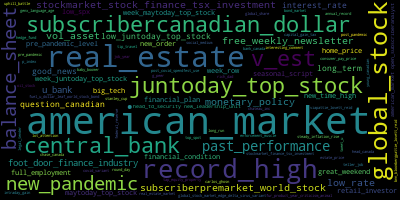

In [ ]:
create_wordcloud(NewNounString)
#create_wordcloud(str(features))

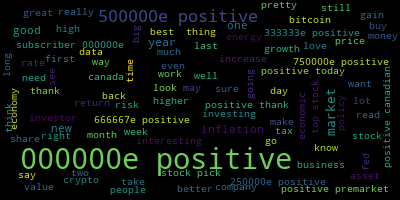

(None,)

In [ ]:
create_wordcloud(tw_list_positive.to_string()),

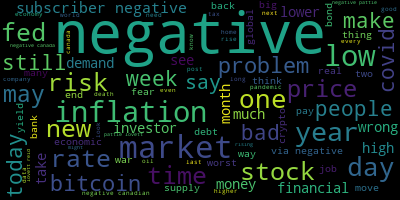

In [ ]:
create_wordcloud(tw_list_negative.to_string())

### Joyplot

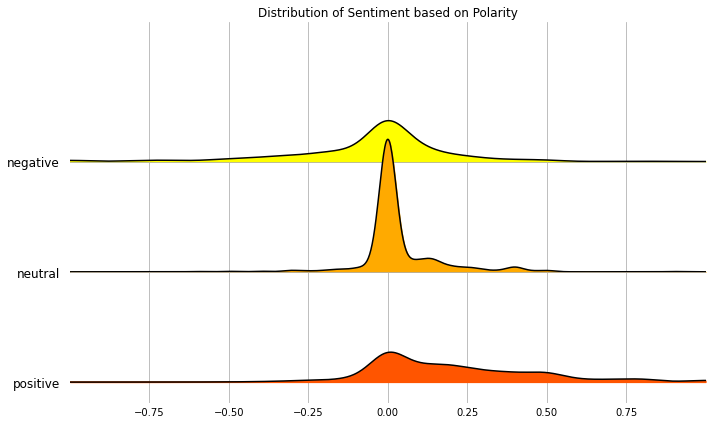

In [ ]:
# Joy Plot
import matplotlib

sm = matplotlib.cm.ScalarMappable(cmap=cm.autumn_r)
%matplotlib inline
ar = tweet_list.value_counts()
fig, axes = joypy.joyplot(tweet_list ,grid=True,by=['sentiment'],column=['polarity'],ylabelsize=12,title="Distribution of Sentiment based on Polarity",figsize=(10,6),colormap=cm.autumn_r,x_range=[-1,0,1])

References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

Topic Modeling

#Modeling

# New Section

# New Section

In [ ]:
# Importing Libraries for Model
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Appliyng Countvectorizer (We can apply coun vectorizer to see all unique words as a new features.)
countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(tweet_list['tweets'])
wordcount_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
wordcount_vect_df.head()

,aapl,abandon,abbottabad,abcl,abcmouse,abd,aberrant,abhorrent,ability,able,abnb,abnormal,abolishing,abour,abrdn,abroad,absence,absentee,absolute,absolutely,absurd,abt,abund,abundant,abundantly,abuse,abusing,ac,acade,academic,acb,accelera,accelerate,accelerated,accelerating,acceleration,accept,acceptable,accepted,accepting,...,yo,york,yorker,young,younger,youth,youtube,yoy,yr,ytd,yu,yuan,yup,yusko,zach,zanzibar,zap,zden,zealand,zebra,zechner,zero,zerohedge,zesg,zhaotong,zilliqa,zinovieff,zk,zlndy,zm,zombie,zone,zoned,zoom,zoomout,zpw,zts,zuckerberg,zuma,zzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = wordcount_vect_df.sum()
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

year          362
stock         344
new           266
today         251
time          243
inflation     238
one           233
subscriber    224
week          206
day           203
dtype: int64